# Data Analysis on Athens BnB Dataset 
## <div> Vassilis Panagakis </div>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
import nltk

## Merge Data in a common csv file

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
from pandas import DataFrame, read_csv

fields = ['id', 'room_type', 'price', 'weekly_price', 'monthly_price', 'neighbourhood', 'name',
          'latitude', 'longitude', 'transit', 'description', 'last_review', 'review_scores_rating']
fields0 = ['id', 'number_of_reviews']
fields00 = ['listing_id', 'date', 'comments']

#get febrouary's data
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/febrouary/listings.csv', usecols = fields)
df['Month'] = 'Febrouary'

df0 = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/febrouary/listings0.csv', usecols = fields0)
df_l = pd.merge(df, df0, on='id', how='left')

df00 = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/febrouary/reviews.csv', usecols = fields00)
df00.rename(columns={"listing_id": "id", "date": "last_review"}, inplace=True) #rename columns of dataframe, to facilate merging

df_l0 = pd.merge(df_l, df00, on=['id', 'last_review'], how='left')
df_l0.to_csv('gdrive/My Drive/Colab Notebooks/train.csv', index = False)

#get march's data
df1 = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/march/listings.csv', usecols = fields)
df1['Month'] = 'March'

df01 = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/march/listings0.csv', usecols = fields0)
df_l1 = pd.merge(df1, df01, on='id', how='left')

df11 = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/march/reviews.csv', usecols = fields00)
df11.rename(columns={"listing_id": "id", "date": "last_review"}, inplace=True) #rename columns of dataframe, to facilate merging

df_l11 = pd.merge(df_l1, df11, on=['id', 'last_review'], how='left')
df_l11.to_csv('gdrive/My Drive/Colab Notebooks/train.csv', mode = 'a', index = False, header = False)

#get april's data
df2 = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/april/listings.csv', usecols = fields)
df2['Month'] = 'April'

df02 = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/april/listings0.csv', usecols = fields0)
df_l2 = pd.merge(df2, df02, on='id', how='left')

df22 = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/april/reviews.csv', usecols = fields00)
df22.rename(columns={"listing_id": "id", "date": "last_review"}, inplace=True) #rename columns of dataframe, to facilate merging

df_l22 = pd.merge(df_l2, df22, on=['id', 'last_review'], how='left')
df_l22.to_csv('gdrive/My Drive/Colab Notebooks/train.csv', mode = 'a', index = False, header = False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Load Data

In [7]:
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/train.csv")

## Process data

In [8]:
# drop all the rows that do not contain a value in 'neighbourhood' column
df.dropna(subset=['neighbourhood'], inplace=True) 
df.reset_index(drop=True, inplace=True)

In [9]:
# fix price values in all columns
df['price'] = df['price'].str.replace('$', '', regex=False)
df['price'] = df['price'].str.replace(',', '', regex=False)
df['price'] = df['price'].astype(float)

df['weekly_price'] = df['weekly_price'].str.replace('$', '', regex=False)
df['weekly_price'] = df['weekly_price'].str.replace(',', '', regex=False)
df['weekly_price'] = df['weekly_price'].astype(float)

df['monthly_price'] = df['monthly_price'].str.replace('$', '', regex=False)
df['monthly_price'] = df['monthly_price'].str.replace(',', '', regex=False)
df['monthly_price'] = df['monthly_price'].astype(float)

In [10]:
# calculate the average price for each column of every month
feb = df.loc[df['Month'] == 'Febrouary']
mpr_feb = feb['price'].mean()
mpr1_feb = feb['weekly_price'].mean()
mpr2_feb = feb['monthly_price'].mean()

mar = df.loc[df['Month'] == 'March']
mpr_mar = mar['price'].mean()
mpr1_mar = mar['weekly_price'].mean()
mpr2_mar = mar['monthly_price'].mean()

apr = df.loc[df['Month'] == 'April']
mpr_apr = apr['price'].mean()
mpr1_apr = apr['weekly_price'].mean()
mpr2_apr = apr['monthly_price'].mean()

In [11]:
# replace the na values of price columns with the average value of the relative column
mpr = (mpr_feb + mpr_mar + mpr_apr) / 3
mpr1 = (mpr1_feb + mpr1_mar + mpr1_apr) / 3
mpr2 = (mpr2_feb + mpr2_mar + mpr2_apr) / 3

df[['price']] = df[['price']].fillna(value=mpr)
df[['weekly_price']] = df[['weekly_price']].fillna(value=mpr1)
df[['monthly_price']] = df[['monthly_price']].fillna(value=mpr2)

#### Display a sample of our processed data

In [13]:
pd.set_option("display.max_rows", None)
df.head()

,id,name,description,transit,neighbourhood,latitude,longitude,room_type,price,weekly_price,monthly_price,last_review,review_scores_rating,Month,number_of_reviews,comments
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Note: 5-day ticket for all the public transpor...,Ambelokipi,37.988879,23.764315,Entire home/apt,71.0,700.0,2800.0,2019-01-12,96.0,Febrouary,17,Το διαμέρισμα ήταν καλύτερο από όσο περίμενα! ...
1,10988,"75m2, 2-br, metro, wi-fi, cable TV",Athens Furnished Apartment No4 is 2-bedroom ap...,Note: 5-day ticket for all the public transpor...,Ambelokipi,37.988434,23.763447,Entire home/apt,82.0,560.0,2240.0,2017-11-23,92.0,Febrouary,31,"Sehr gute Unterkunft, sauber und bequem , ist ..."
2,10990,"50m2, Metro, WI-FI, cableTV, more",Athens Furnished Apartment No3 is 1-bedroom ap...,Note: 5-day ticket for all the public transpor...,Ambelokipi,37.987834,23.764787,Entire home/apt,47.0,420.0,1680.0,2019-02-01,97.0,Febrouary,27,ήταν όλα τελεια
3,10993,"Studio, metro, cable tv, wi-fi, etc",The Studio is an -excellent located -close t...,Note: 5-day ticket for all the public transpor...,Ambelokipi,37.988607,23.764222,Entire home/apt,37.0,350.0,1400.0,2019-02-02,97.0,Febrouary,42,I was in town for 1 week for business. Manos p...
4,10995,"47m2, close to metro,cable TV,wi-fi",AQA No2 is 1-bedroom apartment (47m2) -excell...,Note: 5-day ticket for all the public transpor...,Ambelokipi,37.989498,23.763562,Entire home/apt,47.0,420.0,1680.0,2019-01-11,95.0,Febrouary,16,Φιλόξενος ο οικοδεσπότης και πρόθυμος να μας β...


In [14]:
# create a new dataframe where duplicate information is removed
idf = df.drop_duplicates(subset=['id'], ignore_index=True)

## Queries

### What is the most common type of room type?

In [15]:
most_common = idf['room_type'].value_counts().idxmax()
print("The most common room type for our data is '%s'" % most_common)

The most common room type for our data is 'Entire home/apt'


### Plot the diagrams that illustrate the change of prices within a 3-month period

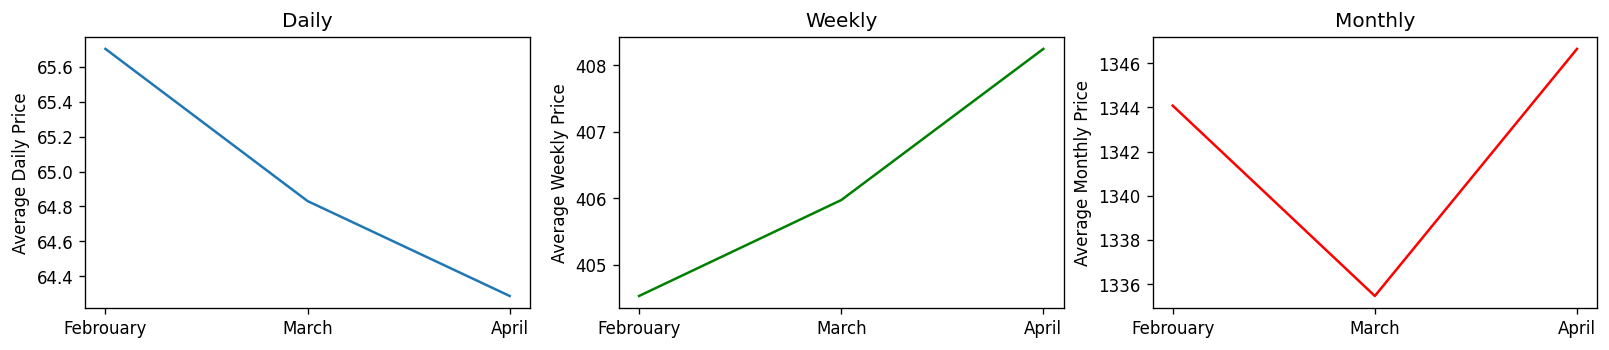

In [20]:
plt.figure(figsize=(8,3), dpi=120) 

plt.subplot(1,3,1)
plt.title('Daily')
plt.plot('month', 'avg_pr', data=pd.DataFrame({'month': np.array(['Febrouary' , 'March' , 'April']) , 'avg_pr': np.array([mpr_feb, mpr_mar, mpr_apr])}), marker=None)
plt.ylabel('Average Daily Price') 

plt.subplot(1,3,2)
plt.title('Weekly')  
plt.plot('month', 'avg_pr', data=pd.DataFrame({'month': np.array(['Febrouary' , 'March' , 'April']) , 'avg_pr': np.array([mpr1_feb, mpr1_mar, mpr1_apr])}), marker=None, color='g')
plt.ylabel('Average Weekly Price')

plt.subplot(1,3,3)
plt.title('Monthly')  
plt.plot('month', 'avg_pr', data=pd.DataFrame({'month': np.array(['Febrouary' , 'March' , 'April']) , 'avg_pr': np.array([mpr2_feb, mpr2_mar, mpr2_apr])}), marker=None, color='r')
plt.ylabel('Average Monthly Price')
plt.subplots_adjust(right=1.7)

plt.show()

### Which are the top 5 neighborhoods with the most reviews?


In [17]:
sum_rev = df.groupby(['neighbourhood']).agg({'number_of_reviews':sum})
sum_rev.apply(lambda x: x.sort_values(ascending=False).head())

,number_of_reviews
neighbourhood,
Plaka,132361
Koukaki,90443
Neos Kosmos,84007
Psyri,54353
Metaxourgeio,44792


### Which is the neighborhood with the most real estate listings?


In [18]:
neigh_bnbs_df = idf.groupby(['neighbourhood']).size().reset_index(name='Number of Estates')
most_bnbs_ind = neigh_bnbs_df["Number of Estates"].idxmax()
most_bnbs = neigh_bnbs_df.loc[most_bnbs_ind, "Number of Estates"] 
neigh_bnbs_df.loc[neigh_bnbs_df['Number of Estates'] == most_bnbs]

,neighbourhood,Number of Estates
24,Plaka,1143


### What is the number of estates per neighbourhood?


In [19]:
neigh_bnbs_df

,neighbourhood,Number of Estates
0,Agios Loukas,80
1,Agios Nikolaos,224
2,Akadimia Platonos,35
3,Ambelokipi,561
4,Attiki,285
5,Exarcheia,458
6,Gazi,170
7,Goudi,33
8,Ilisia,184
9,Kerameikos,65


### What is the number of estates per month?

In [21]:
df.groupby(['Month']).size().reset_index(name='Number of Estates')

,Month,Number of Estates
0,April,9667
1,Febrouary,8867
2,March,9373


### Plot the diagram of 'neighbourhood' column



<Figure size 1200x480 with 0 Axes>

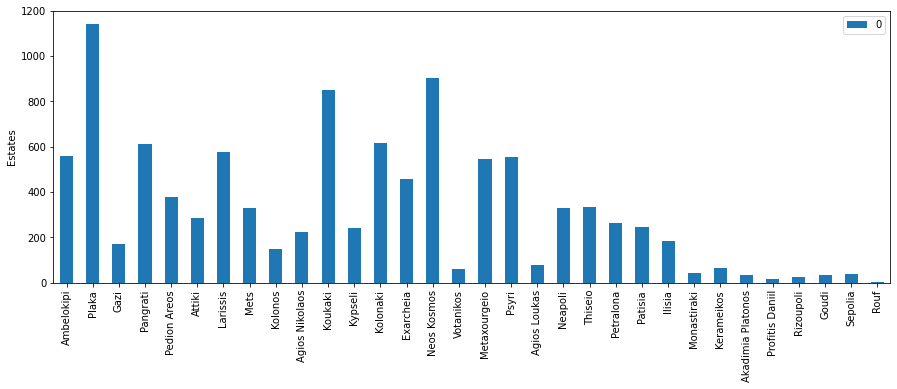

In [22]:
from collections import Counter

plt.figure(figsize=(10,4), dpi=120) 

neigh_list = idf['neighbourhood'].tolist()
neigh_counter = Counter(neigh_list)
hist = DataFrame.from_dict(neigh_counter, orient='index')
hist.plot(kind='bar', figsize=(15,5))
plt.ylabel("Estates")

plt.show()

### Which is the most common room type per neighbourhood?

In [23]:
idf.groupby(['neighbourhood'])['room_type'].agg(pd.Series.mode).reset_index(name='most_common_room_type')

,neighbourhood,most_common_room_type
0,Agios Loukas,Entire home/apt
1,Agios Nikolaos,Entire home/apt
2,Akadimia Platonos,Entire home/apt
3,Ambelokipi,Entire home/apt
4,Attiki,Entire home/apt
5,Exarcheia,Entire home/apt
6,Gazi,Entire home/apt
7,Goudi,Entire home/apt
8,Ilisia,Entire home/apt
9,Kerameikos,Entire home/apt


### Which is the most expensive room type? (all 3 months included) 

In [24]:
mean_pr = df.groupby('room_type')['price'].mean()
print("The most expensive room type is the %s with an average price of %f$" % (mean_pr.idxmax(), mean_pr.max()))

The most expensive room type is the Private room with an average price of 80.881281$


### Display the map of Athens for Febrouary and mark the room type


In [25]:
fb = df.loc[df['Month'] == 'Febrouary']
sam_df = fb.sample(n=1000, random_state=1)

In [26]:
map_Athens = folium.Map(location=[37.983810, 23.727539], tiles='Stamen Terrain', zoom_start=13)

In [27]:
from folium.plugins import MarkerCluster

marker_cluster = MarkerCluster().add_to(map_Athens)

for i, row in sam_df.iterrows(): #repeat for every estate
    if not np.isnan(row['latitude']) and not np.isnan(row['longitude']):
        folium.Marker(location=[row['latitude'], row['longitude']], popup=row['room_type'], icon=folium.Icon(color='green')).add_to(marker_cluster)
    
map_Athens

In [ ]:
map_Athens.save('gdrive/My Drive/Colab Notebooks/map_of_Athens.html')

### Create wordclouds using the data from different columns



In [28]:
from wordcloud import WordCloud, STOPWORDS

#### 'neighbourhood' column

In [29]:
stopwords = set(STOPWORDS)
stopwords.update(["minute", "minutes", "Athen", "Athens", "located", "canceled", "everything", "need", "hidden",
                  "apartment", "place", "stay", "house", "flat", "reservation", "automated"])

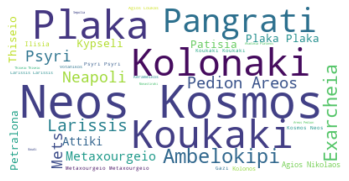

In [30]:
text1 = " ".join(i for i in idf['neighbourhood'])
wc1 = WordCloud(stopwords=stopwords, background_color="white").generate(text1)

plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 'transit' column

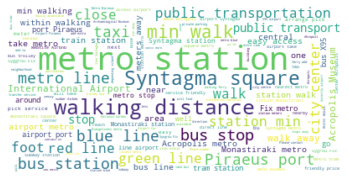

In [ ]:
tr_df = idf.dropna(subset=['transit']) 

text2 = " ".join(i for i in tr_df['transit'])
wc2 = WordCloud(stopwords=stopwords, background_color="white").generate(text2)

plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 'description' column

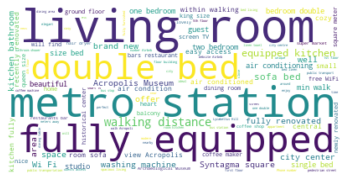

In [ ]:
des_df = idf.dropna(subset=['description']) 

text3 = " ".join(i for i in des_df['description'])
wc3 = WordCloud(stopwords=stopwords, background_color="white").generate(text3)

plt.imshow(wc3, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 'comments' column

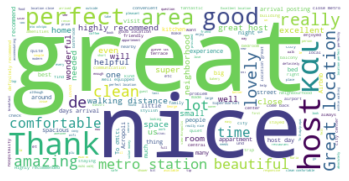

In [ ]:
lr_df = idf.dropna(subset=['comments']) 

text4 = " ".join(i for i in lr_df['comments'])
wc4 = WordCloud(stopwords=stopwords, background_color="white").generate(text4)

plt.imshow(wc4, interpolation='bilinear')
plt.axis("off")
plt.show()

### Create a wordcloud focused on 'Description' column


In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["minute", "minutes", "Athen", "Athens", "located", "canceled", "everything", "need", "hidden",
                  "apartment", "place", "stay", "house", "flat", "reservation", "automated",
                  "square", "walking", "heart", "metro", "station", "Acropolis", "center"])

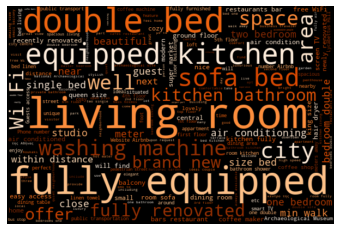

In [ ]:
des_df = idf.dropna(subset=['description']) 

text = " ".join(i for i in des_df['description'])
wc = WordCloud(stopwords=stopwords, width=600, height=400, colormap="Oranges_r").generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Which are the 3 best ranked neighbourhoods based on review score?

In [31]:
mean_rev = idf.groupby('neighbourhood')['review_scores_rating'].mean().reset_index(name='average_rating')
mean_rev.nlargest(3, 'average_rating')

,neighbourhood,average_rating
29,Sepolia,98.375000
25,Profitis Daniil,97.916667
7,Goudi,97.625000


### Which are the 3 cheapest neighbourhoods?

In [32]:
ppn = idf.groupby('neighbourhood')['price'].mean().reset_index(name='average_price_per_neighbourhood')
ppn.nsmallest(3, 'average_price_per_neighbourhood')

,neighbourhood,average_price_per_neighbourhood
1,Agios Nikolaos,35.178571
4,Attiki,37.403509
29,Sepolia,38.105263


### Plot the bar digram for the 3 main price categories 

In [33]:
data = []

for i in df['price']:
    if i < 40.0:  # Cheap: estate costs less than 40$
        data.append('Cheap')
    elif 40.0 <= i <= 70.0: # Normal: estate costs between 40$ and 70$
        data.append('Normal')
    else:
        data.append('Expensive') #Expensive: estate costs more than 70$

df['price_category'] = data      

In [34]:
idf = df.drop_duplicates(subset=['id'], ignore_index=True)

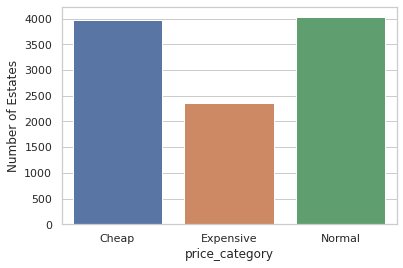

In [35]:
pr_cat_df = idf.groupby(['price_category']).size().reset_index(name='Number of Estates')

sns.set(style="whitegrid")
ax = sns.barplot(x="price_category", y="Number of Estates", data=pr_cat_df)

### Top 10 Bigrams of the dataset

In [36]:
# combine 'name' and 'description' columns in a new column
df['name_descr'] = df['name'] + ' ' + df['description']
df.dropna(subset=['name_descr'], inplace=True)

# store new column's data in a list
list_text = df["name_descr"].tolist()

In [38]:
# remove symbols from the new column
SYMBOLS = '{}()[].,:;+-*/&|<>=~$'
clean_text = [item.translate({ord(SYM): None for SYM in SYMBOLS} ).strip() for item in list_text]

# store cleaned data in another column
df['clean_nd'] = pd.Series(clean_text,index=df.index)
idf = df.drop_duplicates(subset=['id'], ignore_index=True)

# create a list containing the cleaned data
clean_text = idf["clean_nd"].tolist()

In [42]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# create a clean string 
bigstring = ' '.join(clean_text)

# remove all the stopwords from the string
tokens = word_tokenize(bigstring)
no_sw_tokens = [word for word in tokens if not word in stopwords.words()]

In [46]:
from nltk.collocations import BigramCollocationFinder

finder = BigramCollocationFinder.from_words(tokens)
finder.apply_freq_filter(1000) # keep only bigrams that appear 1000+ times
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigrams = finder.nbest(bigram_measures.likelihood_ratio, 10) # find the 10 bigrams with the highest PMI
bigrams

[('living', 'room'),
 ('of', 'Athens'),
 ('in', 'the'),
 ('fully', 'equipped'),
 ('walking', 'distance'),
 ('metro', 'station'),
 ('heart', 'of'),
 ('The', 'apartment'),
 ('double', 'bed'),
 ('apartment', 'is')]